# Understanding LLM Structure

This notebook demonstrates the structure of a small language model (TinyLlama) and visualizes its weights.

In [3]:
!pip install transformers torch matplotlib seaborn

In [2]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Loading TinyLlama

We'll load the TinyLlama model, which is a small version of the Llama model family.

In [3]:
# Load model and tokenizer
model_name = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"
model = AutoModelForCausalLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

model.safetensors:  77%|#######6  | 1.69G/2.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

## Model Structure

Let's examine the model's architecture and parameters.

In [4]:
print(f"Model architecture: {model.__class__.__name__}")
print(f"Number of parameters: {sum(p.numel() for p in model.parameters()) / 1e6:.2f}M")
print("\nModel layers:")
for name, module in model.named_modules():
    if isinstance(module, torch.nn.Linear):
        print(f"{name}: {module.weight.shape}")

Model architecture: LlamaForCausalLM
Number of parameters: 1100.05M

Model layers:
model.layers.0.self_attn.q_proj: torch.Size([2048, 2048])
model.layers.0.self_attn.k_proj: torch.Size([256, 2048])
model.layers.0.self_attn.v_proj: torch.Size([256, 2048])
model.layers.0.self_attn.o_proj: torch.Size([2048, 2048])
model.layers.0.mlp.gate_proj: torch.Size([5632, 2048])
model.layers.0.mlp.up_proj: torch.Size([5632, 2048])
model.layers.0.mlp.down_proj: torch.Size([2048, 5632])
model.layers.1.self_attn.q_proj: torch.Size([2048, 2048])
model.layers.1.self_attn.k_proj: torch.Size([256, 2048])
model.layers.1.self_attn.v_proj: torch.Size([256, 2048])
model.layers.1.self_attn.o_proj: torch.Size([2048, 2048])
model.layers.1.mlp.gate_proj: torch.Size([5632, 2048])
model.layers.1.mlp.up_proj: torch.Size([5632, 2048])
model.layers.1.mlp.down_proj: torch.Size([2048, 5632])
model.layers.2.self_attn.q_proj: torch.Size([2048, 2048])
model.layers.2.self_attn.k_proj: torch.Size([256, 2048])
model.layers.2.s

## Visualizing Weights

Let's visualize the weights of the up_projection layer in the last transformer block.

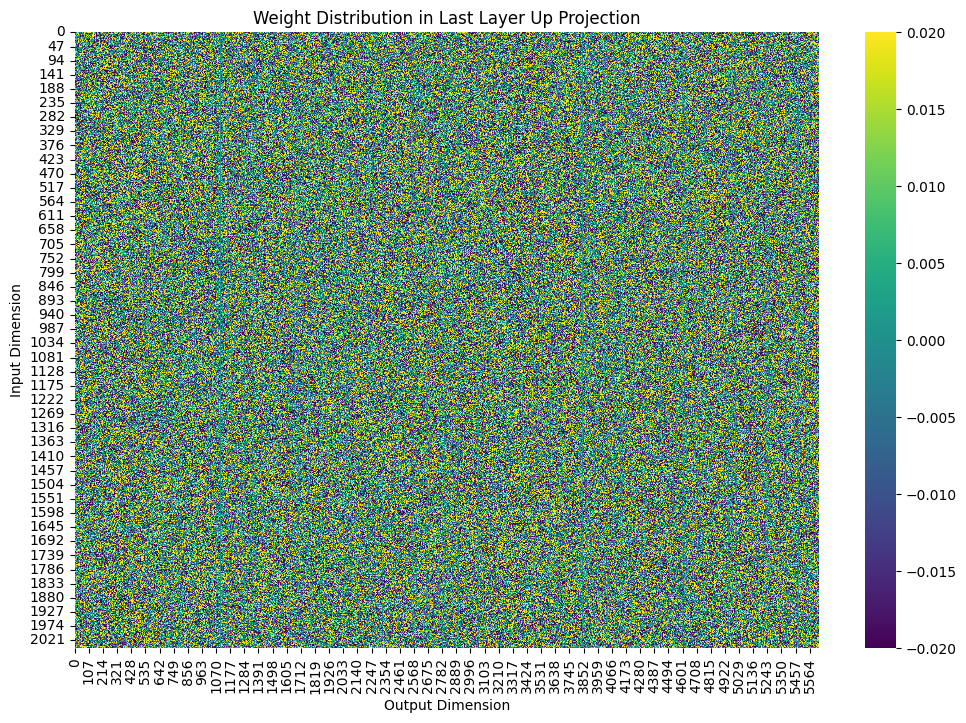

In [8]:
# Get the up_projection weights from the last layer
last_layer = model.model.layers[-1].mlp.down_proj
weights = last_layer.weight.detach().cpu().numpy()

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(weights, cmap='viridis', center=0, vmin=-0.02, vmax=0.02)
plt.title('Weight Distribution in Last Layer Up Projection')
plt.xlabel('Output Dimension')
plt.ylabel('Input Dimension')
plt.show()

## Weight Statistics

Let's analyze the distribution of weights in this layer.

Weight statistics for up_projection layer:
Mean: 0.0000
Std: 0.0180
Min: -0.5859
Max: 0.6914


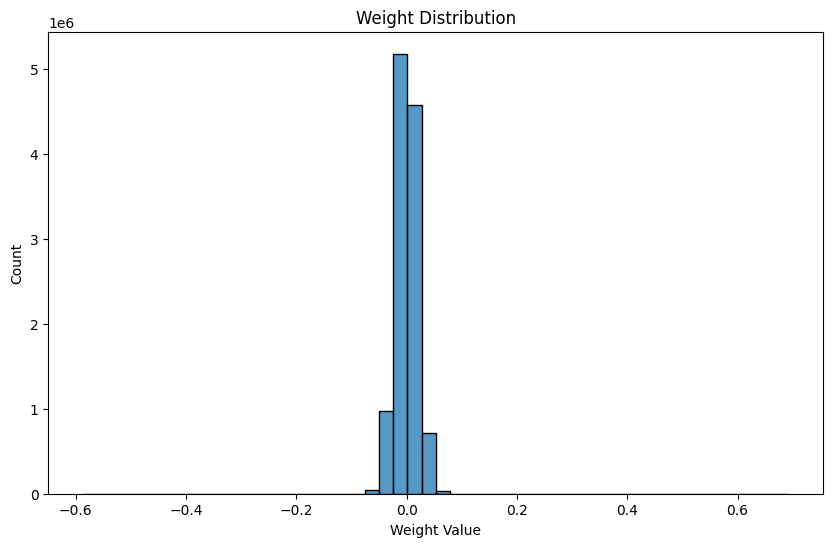

In [7]:
print(f"Weight statistics for up_projection layer:")
print(f"Mean: {weights.mean():.4f}")
print(f"Std: {weights.std():.4f}")
print(f"Min: {weights.min():.4f}")
print(f"Max: {weights.max():.4f}")

# Plot weight distribution
plt.figure(figsize=(10, 6))
sns.histplot(weights.flatten(), bins=50)
plt.title('Weight Distribution')
plt.xlabel('Weight Value')
plt.ylabel('Count')
plt.show()